In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import json 
import os
import sys  
import warnings
warnings.filterwarnings('ignore')
from utils import data_sel, resample_slider, list_has_emoji, resample_human
from emoji import UNICODE_EMOJI

matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)
matplotlib.rcParams['font.size']=20
p1 = 'Giacomo'
p2 = 'Chiara'

In [2]:
display(data_sel)

Dropdown(description='Dataset:', options=('chiara',), value='chiara')

In [3]:


def read(fp):
    data = pd.read_csv('data.csv')
    data.text = data.text.fillna('')
    data['date'] = data.date.apply(lambda x: pd.to_datetime(x))
    data['month'] = data.date.apply(lambda x: x.month)
    data['day'] = data.date.apply(lambda x: x.day)
    data['hour'] = data.date.apply(lambda x: x.hour)
    data['minute'] = data.date.apply(lambda x: x.minute)
    data['second'] = data.date.apply(lambda x: x.second)
    data['da'] = data['da'].apply(lambda x: x.split(' ')[0])
    data['emoji'] = data.text.apply(lambda x: list_has_emoji(x))
    data['msg_len'] = data['text'].apply(lambda x: len(x))
    data['word_count'] = data['text'].apply(lambda x: len(x.split(' ')))
    data['word_len'] = data['text'].apply(lambda x: [len(word) for word in x.split(' ')])
    data['avg_word_len'] = data['word_len'].apply(lambda x: sum(x)/len(x)) 
    data = data.set_index('date')
    data = data.drop(['Unnamed: 0'], axis=1)
    data.head()
    return data


In [4]:
data = read(data_sel.value)
data.head(10)

,da,text,month,day,hour,minute,second,emoji,msg_len,word_count,word_len,avg_word_len
date,,,,,,,,,,,,
2020-04-09 00:40:59,Giacomo,Si bel,4,9,0,40,59,0,6,2,"[2, 3]",2.500000
2020-04-09 00:41:01,Giacomo,Benvenuta,4,9,0,41,1,0,9,1,[9],9.000000
2020-04-09 00:41:05,Giacomo,Nel mondo reale,4,9,0,41,5,0,15,3,"[3, 5, 5]",4.333333
2020-04-09 00:41:09,Chiara,😹,4,9,0,41,9,1,1,1,[1],1.000000
2020-04-09 00:41:11,Giacomo,Comunque,4,9,0,41,11,0,8,1,[8],8.000000
2020-04-09 00:41:11,Chiara,Sicuro,4,9,0,41,11,0,6,1,[6],6.000000
2020-04-09 00:41:20,Giacomo,Se duri 3 sms in media,4,9,0,41,20,0,22,6,"[2, 4, 1, 3, 2, 5]",2.833333
2020-04-09 00:41:25,Chiara,Mi piace il suono che fanno i messaggi,4,9,0,41,25,0,38,8,"[2, 5, 2, 5, 3, 5, 1, 8]",3.875000
2020-04-09 00:41:33,Chiara,Sono una persona semplice,4,9,0,41,33,0,25,4,"[4, 3, 7, 8]",5.500000


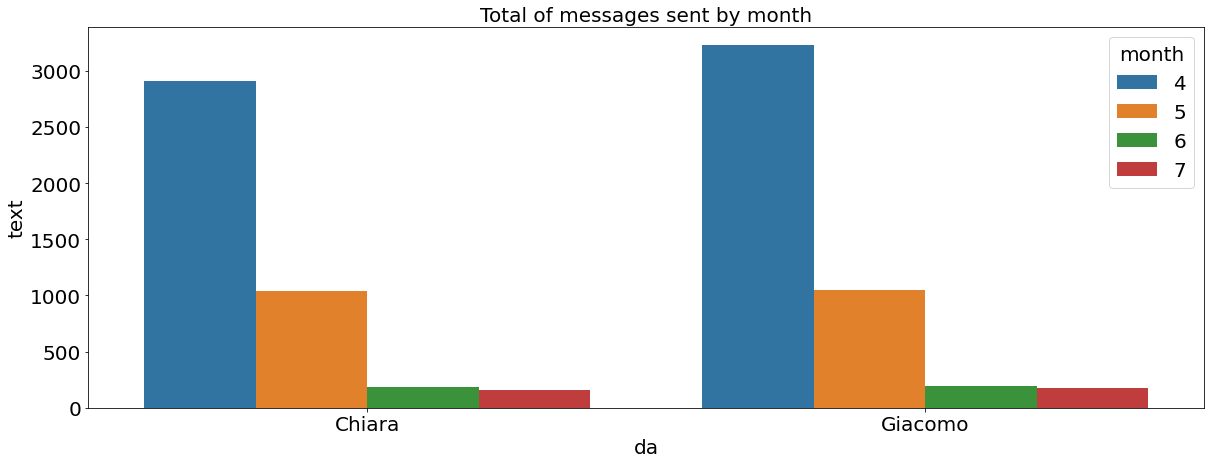

In [5]:
grouped_by_from = data.groupby(['da','month']).count()
grouped_by_from['month'] = grouped_by_from.index.get_level_values(1)
grouped_by_from['da'] = grouped_by_from.index.get_level_values(0)
ax = sns.barplot(y="text", x=grouped_by_from.da, data=grouped_by_from, hue='month').set_title('Total of messages sent by month', fontsize=20);

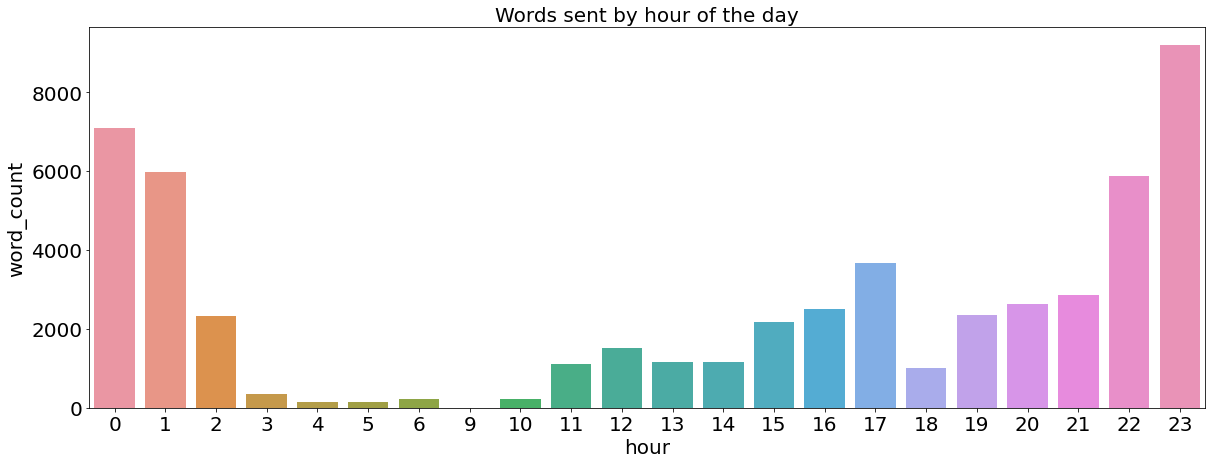

In [37]:
grouped_by_hour = data.groupby('hour').sum()
grouped_by_hour
ax = sns.barplot(y='word_count', x=grouped_by_hour.index, data=grouped_by_hour).set_title('Words sent by hour of the day', fontsize=20);

### _Choose_ resample size

In [7]:
display(resample_slider)

SelectionSlider(description='Resample:', options=('m', 'w', 'd'), value='m')

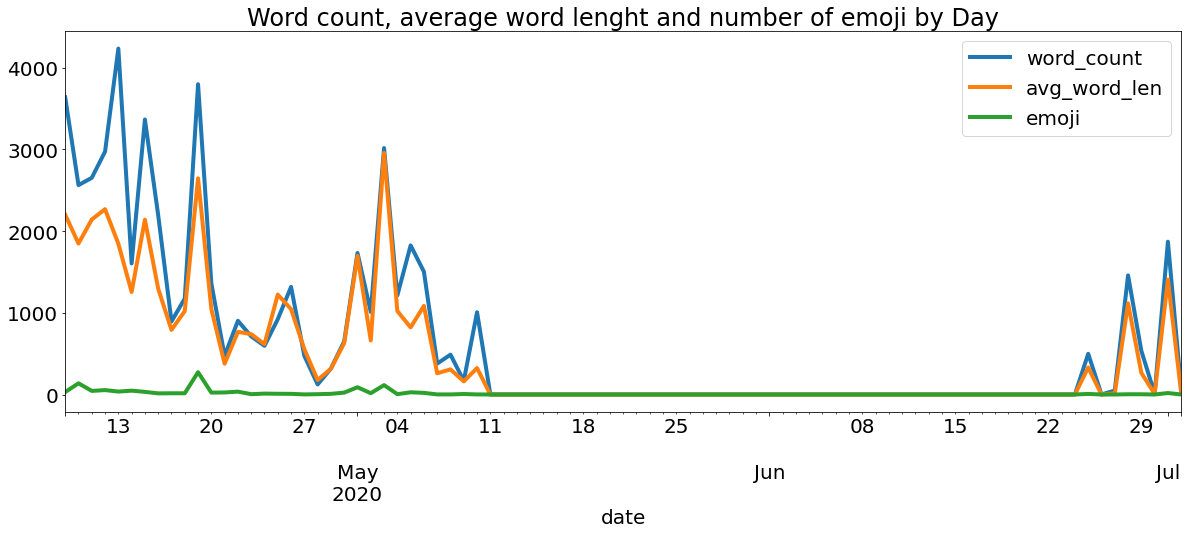

In [30]:
data[['word_count', 'avg_word_len', 'emoji']].resample(resample_slider.value).sum().plot(linewidth=4, title=f'Word count, average word lenght and number of emoji by {resample_human[resample_slider.value]}');

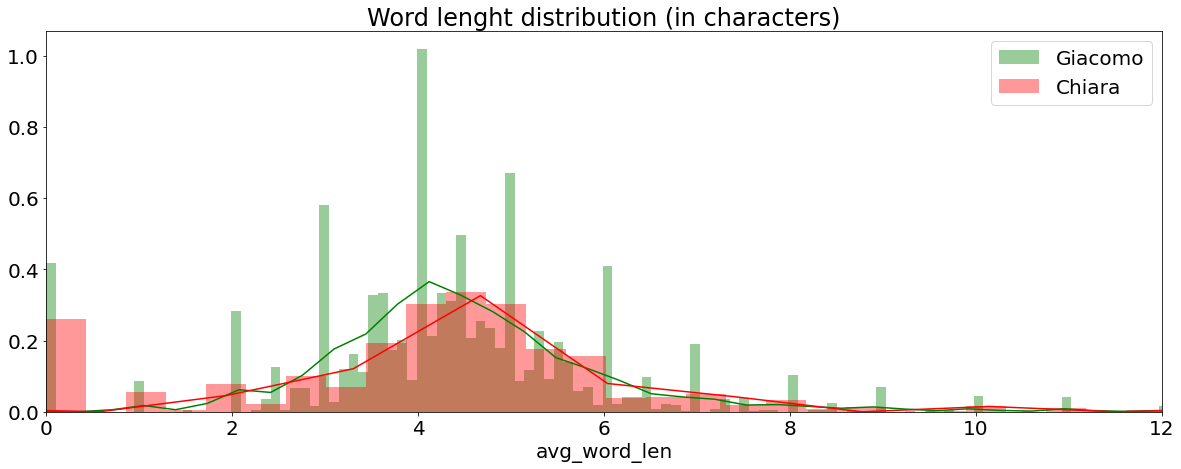

In [9]:
ax = sns.distplot(data[data['da']==p1].avg_word_len, label=p1, color='green', bins =400).set_title('Word lenght distribution (in characters)')
ax = sns.distplot(data[data['da']==p2].avg_word_len, label=p2, color='red', bins =400)
ax.set(xlim=(0, 12))
ax.legend()

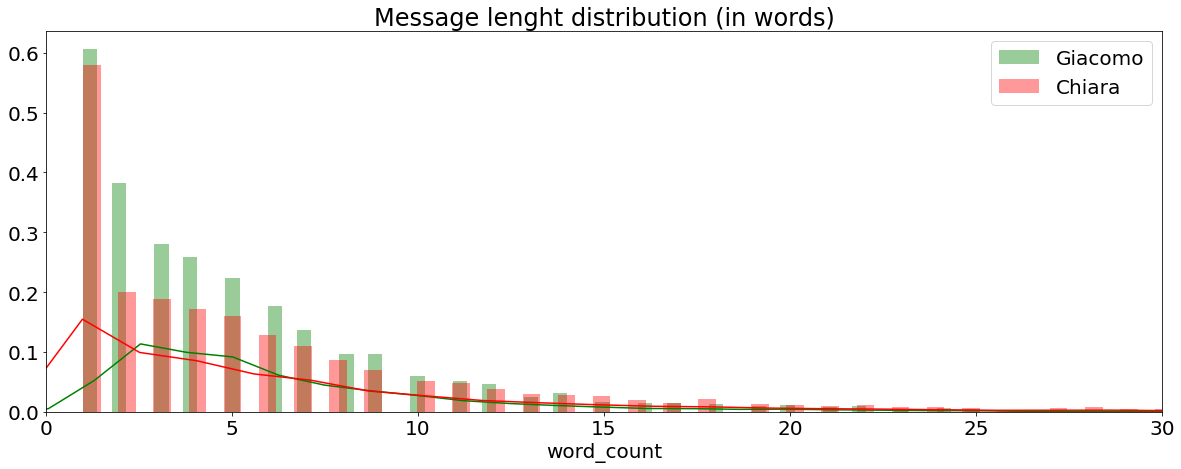

In [10]:
ax = sns.distplot(data[data['da']==p1].word_count, label=p1, color='green', bins =400).set_title('Message lenght distribution (in words)')
ax = sns.distplot(data[data['da']==p2].word_count, label=p2, color='red', bins =400)
ax.set(xlim=(0, 30))
ax.legend();

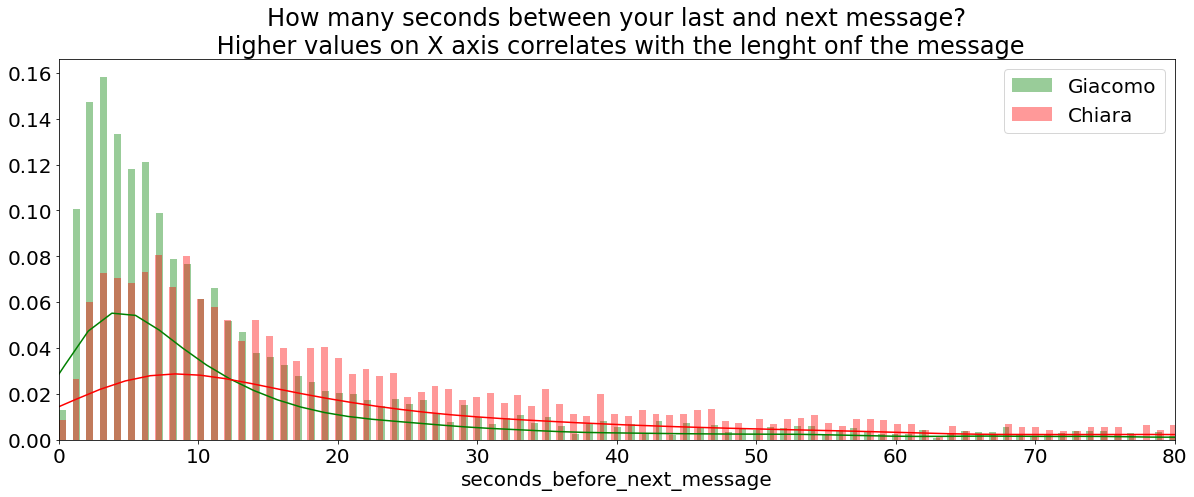

In [42]:
only_p1 = data[data['da']==p1]
only_p2 = data[data['da']==p2]
only_p1['seconds_before_next_message'] = only_p1.index.to_series().diff().astype('timedelta64[s]')
only_p2['seconds_before_next_message'] = only_p2.index.to_series().diff().astype('timedelta64[s]')
only_p1_small_delta = only_p1.query('seconds_before_next_message < 200')
only_p2_small_delta = only_p2.query('seconds_before_next_message < 200')
ax = sns.distplot(only_p1_small_delta.seconds_before_next_message, label=p1, color='green', bins =400).set_title('How many seconds between your last and next message?\n Higher values on X axis correlates with the lenght of the message')
ax = sns.distplot(only_p2_small_delta.seconds_before_next_message, label=p2, color='red', bins =400)
ax.set(xlim=(0, 80))
ax.legend();